# Imports

In [75]:
import cv2 as cv
from utils import find_biggest_contour,show_images,wrapped_paper,cropp_box_image,replace_image_with_white,finall_extract,correct_id_mcq,split_questions
import numpy as np

In [60]:
width=480
height=480
borders=30

# Read Image

In [61]:
path=input("Enter the path of the image")
image=cv.resize(cv.imread(path),(width,height))

# Preprocessing

## 1-Get the edges

In [62]:
gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
blur=cv.GaussianBlur(gray,(5,5),1)
edged = cv.Canny(blur,75, 100)

## 2-Get the contours


In [63]:
edge_copy=edged.copy()
contours, hierarchy = cv.findContours(edge_copy, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_color = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
cv.drawContours(image_color, contours, -1, (0, 255, 0), 10)
print("")

## 3-Get the paper

In [80]:
biggest,max_area=find_biggest_contour(contours)

In [65]:
wrapped_paper_image=wrapped_paper(width,height,biggest,blur)
wrapped_paper_gray=wrapped_paper(width,height,biggest,gray)


## 4-Thresold

In [66]:
adaptive_thresh = cv.adaptiveThreshold(
    wrapped_paper_image, 
    255, 
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # Use Gaussian weights for neighborhood
    cv.THRESH_BINARY, 
    11,  # Block size (neighborhood size)
    2   # Constant subtracted from the mean
)


## 4-Remove impluse Noise

In [67]:

# Step 4: Replace noise with white patches
contours, _ = cv.findContours(adaptive_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
output = adaptive_thresh.copy()
replace_image_with_white(contours,output,  30)
   

## 6-Extract Box

In [68]:

actual_box_addative,actual_box_gray=cropp_box_image(output,width,height,wrapped_paper_gray)
cv.imshow("1 Contours", actual_box_gray)
cv.waitKey(0)
cv.destroyAllWindows()


## 7-Remove Name section

In [69]:
mcq_regions,id,name=finall_extract(actual_box_addative,actual_box_gray)

68
68
69


In [70]:
final_id = ""
id_answers = correct_id_mcq(id)
for id_answer in id_answers:
    final_id += str(np.argmin(id_answer))  # Convert to string before concatenation
final_id

'4343435'

## Correction 

In [71]:
for question in mcq_regions:
    answers=split_questions(question,(7,3),2)
    for question in answers :
        print(np.argmin(question))
        

0
1
2
1
2
0
0
3
0
1
1
2
3
1
2
3
1
3
1
0
1
2
3
2
1
0
0
1
1
1
0
2
0
0
3
3
0
3
0
1
2
3
0
0
0


# Show Image

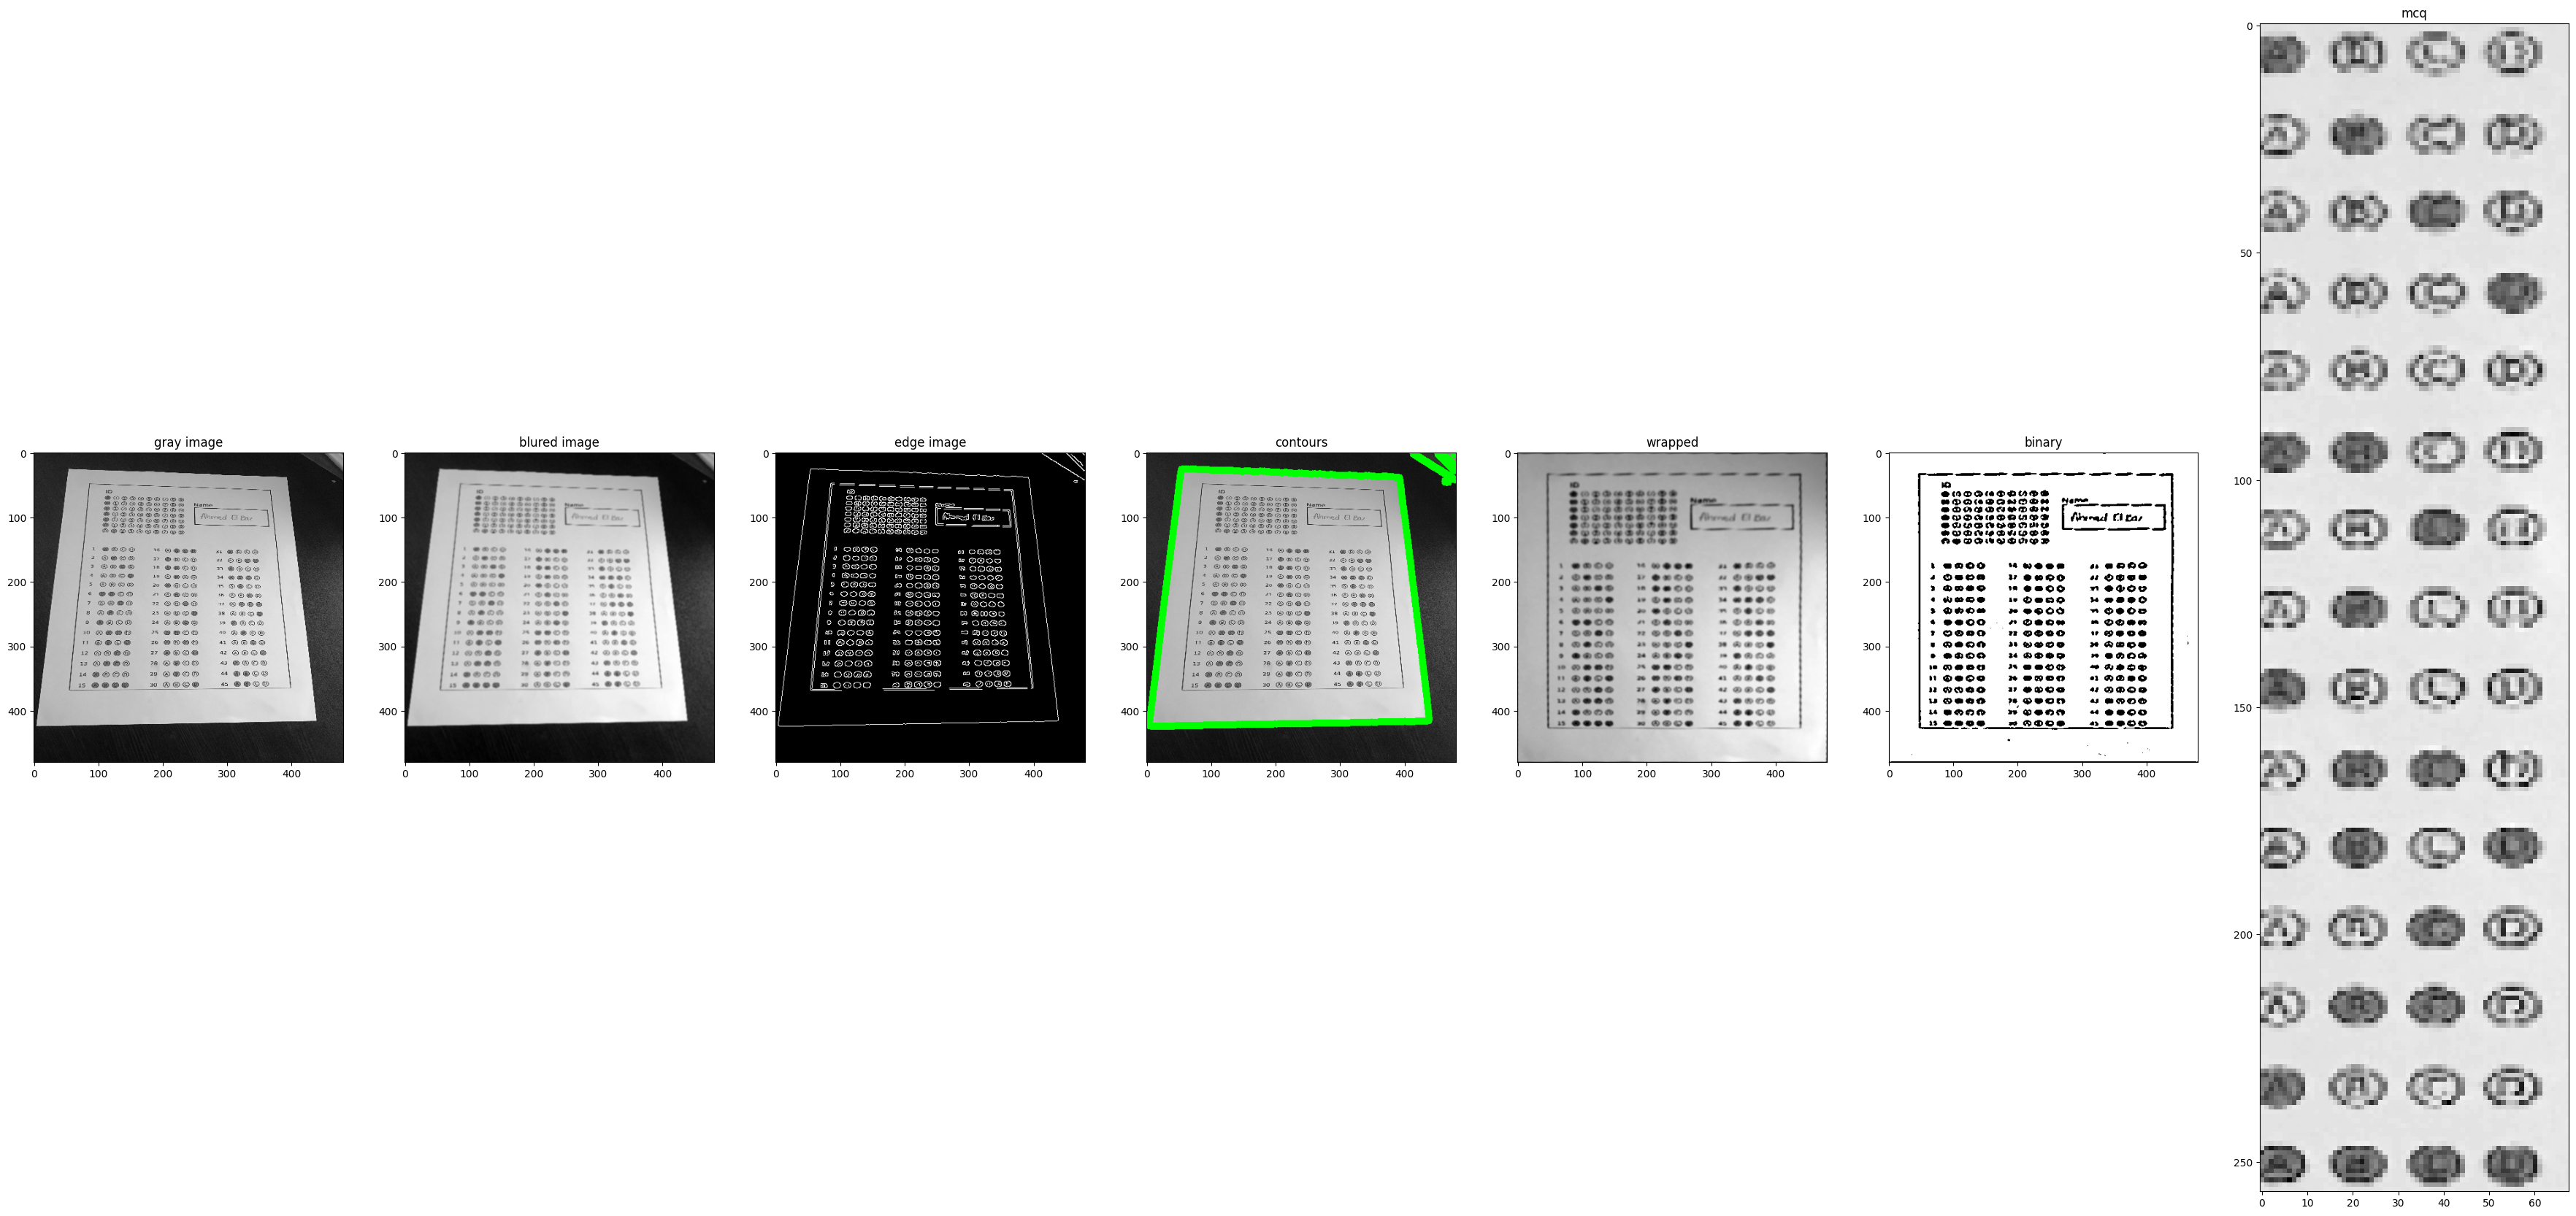

In [72]:
show_images([gray,blur,edged,image_color,wrapped_paper_image,adaptive_thresh,id],["gray image","blured image","edge image","contours","wrapped","binary","mcq"])